# Week 5. Quiz 정답

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

### A. 데이터 생성

In [3]:
# 무작위 시드 설정
np.random.seed(1384)

# 파라미터 설정
instance = 500
population = [True, False]
test = ['A유형','B유형', 'C유형', 'D유형', 'E유형']
date = pd.to_datetime("1st of April, 1,2021") # 수업시작날짜

# 데이터 생성
df = pd.DataFrame({
    '일자' : date + pd.to_timedelta(np.arange(instance), 'D'), # pd.util.testing.makeDateIndex(instance, freq="W")
    '이름' : [np.random.choice(['영희','희영', '철수', '수철']) for i in range(instance)],
    '국어' : np.random.randint(30,98,instance),  # 30점에서 98점사이에서 500개를 무작위추출
    '영어' : np.random.randint(25,95,instance),
    '수학' : np.random.randint(10,90,instance),
    '과학' : np.random.randint(60,100,instance),
    '공부시간' : np.random.randint(1,5,instance) + np.random.random(instance).round(2),  # 1시간에서 5시간으로 + 알파 무작위
    '시험명' : test*int((instance/len(test))),
    '출석' : [(np.random.choice(population, p=[0.8, 0.2]))*1 for i in range(instance)] # 출석울 80%
})  
    
df.head()

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,3.94,A유형,0
1,2001-04-02 20:21:00,수철,93,48,81,84,3.02,B유형,0
2,2001-04-03 20:21:00,수철,30,64,26,84,2.64,C유형,1
3,2001-04-04 20:21:00,철수,74,72,46,65,4.75,D유형,1
4,2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1


In [22]:
df.sort_values('일자')['국어'].cumsum()

0         76
1        169
2        199
3        273
4        315
       ...  
495    31265
496    31304
497    31341
498    31414
499    31507
Name: 국어, Length: 500, dtype: int32

In [23]:
df.sort_values('일자')['국어'].cumsum()
df.sort_values('일자')['국어'].cumcount()

0         76
1        169
2        199
3        273
4        315
       ...  
495    31265
496    31304
497    31341
498    31414
499    31507
Name: 국어, Length: 500, dtype: int32

AttributeError: 'Series' object has no attribute 'cumcount'

## <font color='red'> groupby에만 cumcount 같이 사용 가능^^

In [5]:
df.sort_values('일자', inplace=True)
df.groupby('시험명').cumcount()

0       0
1       0
2       0
3       0
4       0
       ..
495    99
496    99
497    99
498    99
499    99
Length: 500, dtype: int64

In [6]:
for i, j in df.groupby('시험명'):
    i
    j.head(2)

'A유형'

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,3.94,A유형,0
5,2001-04-06 20:21:00,영희,31,36,87,80,1.30,A유형,1


'B유형'

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
1,2001-04-02 20:21:00,수철,93,48,81,84,3.02,B유형,0
6,2001-04-07 20:21:00,철수,81,54,24,78,2.06,B유형,1


'C유형'

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
2,2001-04-03 20:21:00,수철,30,64,26,84,2.64,C유형,1
7,2001-04-08 20:21:00,철수,81,61,66,67,2.47,C유형,0


'D유형'

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
3,2001-04-04 20:21:00,철수,74,72,46,65,4.75,D유형,1
8,2001-04-09 20:21:00,수철,55,77,87,74,3.12,D유형,0


'E유형'

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
4,2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1
9,2001-04-10 20:21:00,희영,74,55,25,85,1.38,E유형,1


In [7]:
df['시험명'].unique()

array(['A유형', 'B유형', 'C유형', 'D유형', 'E유형'], dtype=object)

In [8]:
for i in df['시험명'].unique():
    df.groupby('시험명').get_group(i).head(2)

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,3.94,A유형,0
5,2001-04-06 20:21:00,영희,31,36,87,80,1.30,A유형,1


,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
1,2001-04-02 20:21:00,수철,93,48,81,84,3.02,B유형,0
6,2001-04-07 20:21:00,철수,81,54,24,78,2.06,B유형,1


,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
2,2001-04-03 20:21:00,수철,30,64,26,84,2.64,C유형,1
7,2001-04-08 20:21:00,철수,81,61,66,67,2.47,C유형,0


,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
3,2001-04-04 20:21:00,철수,74,72,46,65,4.75,D유형,1
8,2001-04-09 20:21:00,수철,55,77,87,74,3.12,D유형,0


,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
4,2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1
9,2001-04-10 20:21:00,희영,74,55,25,85,1.38,E유형,1


In [26]:
df[df.groupby('시험명').cumcount()==2] 

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
10,2001-04-11 20:21:00,철수,69,49,14,85,4.92,A유형,1
11,2001-04-12 20:21:00,수철,96,70,13,69,4.57,B유형,0
12,2001-04-13 20:21:00,희영,50,65,48,73,1.08,C유형,1
13,2001-04-14 20:21:00,철수,71,46,71,84,1.59,D유형,1
14,2001-04-15 20:21:00,수철,54,78,21,95,3.88,E유형,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      500 non-null    datetime64[ns]
 1   이름      500 non-null    object        
 2   국어      500 non-null    int32         
 3   영어      500 non-null    int32         
 4   수학      500 non-null    int32         
 5   과학      500 non-null    int32         
 6   공부시간    500 non-null    float64       
 7   시험명     500 non-null    object        
 8   출석      500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(2)
memory usage: 31.2+ KB


In [27]:
data = df.groupby('시험명').get_group('E유형')
data

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
4,2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1
9,2001-04-10 20:21:00,희영,74,55,25,85,1.38,E유형,1
14,2001-04-15 20:21:00,수철,54,78,21,95,3.88,E유형,1
19,2001-04-20 20:21:00,철수,46,71,50,92,4.03,E유형,0
24,2001-04-25 20:21:00,철수,70,86,19,74,3.03,E유형,1
...,...,...,...,...,...,...,...,...,...
479,2002-07-24 20:21:00,수철,64,29,72,80,2.81,E유형,0
484,2002-07-29 20:21:00,영희,39,59,53,79,4.12,E유형,1
489,2002-08-03 20:21:00,희영,45,36,13,90,4.60,E유형,1
494,2002-08-08 20:21:00,희영,39,84,33,92,2.44,E유형,1


In [29]:
data['머문시간'] = data['일자'].diff()
data.head()

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석,머문시간
4,2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1,NaT
9,2001-04-10 20:21:00,희영,74,55,25,85,1.38,E유형,1,5 days
14,2001-04-15 20:21:00,수철,54,78,21,95,3.88,E유형,1,5 days
19,2001-04-20 20:21:00,철수,46,71,50,92,4.03,E유형,0,5 days
24,2001-04-25 20:21:00,철수,70,86,19,74,3.03,E유형,1,5 days


In [30]:
data['머문시간'].dt.total_seconds()

4           NaN
9      432000.0
14     432000.0
19     432000.0
24     432000.0
         ...   
479    432000.0
484    432000.0
489    432000.0
494    432000.0
499    432000.0
Name: 머문시간, Length: 100, dtype: float64

In [20]:
data['머문시간'] = data['머문시간'].shift(-1)
data

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석,머문시간
4,2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1,5 days
9,2001-04-10 20:21:00,희영,74,55,25,85,1.38,E유형,1,5 days
14,2001-04-15 20:21:00,수철,54,78,21,95,3.88,E유형,1,5 days
19,2001-04-20 20:21:00,철수,46,71,50,92,4.03,E유형,0,5 days
24,2001-04-25 20:21:00,철수,70,86,19,74,3.03,E유형,1,5 days
...,...,...,...,...,...,...,...,...,...,...
479,2002-07-24 20:21:00,수철,64,29,72,80,2.81,E유형,0,5 days
484,2002-07-29 20:21:00,영희,39,59,53,79,4.12,E유형,1,5 days
489,2002-08-03 20:21:00,희영,45,36,13,90,4.60,E유형,1,5 days
494,2002-08-08 20:21:00,희영,39,84,33,92,2.44,E유형,1,5 days


### 문제 0. 영어 75점이상이며 국어가  95점 이하인 학생은 총 몇 명인가?

In [5]:
df.loc[(df['영어']>=75) & (df['국어']<=95), : ].shape
df.loc[(df['영어']>=75) & (df['국어']<=95), : ]

(139, 9)

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,3.94,A유형,0
8,2001-04-09 20:21:00,수철,55,77,87,74,3.12,D유형,0
14,2001-04-15 20:21:00,수철,54,78,21,95,3.88,E유형,1
15,2001-04-16 20:21:00,수철,82,82,61,65,2.23,A유형,1
16,2001-04-17 20:21:00,영희,42,86,76,63,2.87,B유형,1
...,...,...,...,...,...,...,...,...,...
478,2002-07-23 20:21:00,철수,42,86,88,63,3.79,D유형,1
481,2002-07-26 20:21:00,희영,51,81,73,86,4.76,B유형,1
483,2002-07-28 20:21:00,수철,30,92,66,80,2.39,D유형,1
494,2002-08-08 20:21:00,희영,39,84,33,92,2.44,E유형,1


### 문제 1. 국어과목 최고 점수를 제일 많이 받은 학생은?

In [64]:
df.loc[df['국어'] == df['국어'].max(), :]
df.loc[df['국어'] == df['국어'].max(), :]['이름'].value_counts()

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
137,2001-08-16 20:21:00,희영,97,71,78,94,3.95,C유형,1
201,2001-10-19 20:21:00,철수,97,40,69,88,2.70,B유형,1
214,2001-11-01 20:21:00,영희,97,86,35,69,1.10,E유형,1
314,2002-02-09 20:21:00,철수,97,92,66,97,2.35,E유형,1
358,2002-03-25 20:21:00,희영,97,66,46,88,4.25,D유형,1


희영    2
철수    2
영희    1
Name: 이름, dtype: int64

### 문제 2. 국어 평균점수가 가장 낮은 학생은 누구인가?

In [65]:
df.groupby('이름')['국어', '영어', '수학', '과학'].mean().sort_values('국어', ascending=False)

,국어,영어,수학,과학
이름,,,,
철수,65.972477,58.293578,49.669725,79.018349
희영,63.330579,60.057851,48.644628,80.347107
영희,62.343750,58.734375,48.671875,81.710938
수철,61.077465,61.028169,49.232394,79.246479


### 문제 3. 'C 유형' 시험의 국 영 수 과목의 전체 평균 점수를 구하라(5점)

In [66]:
df[df['시험명'] == 'C유형'][['국어', '영어', '수학']].mean()
df[df['시험명'] == 'C유형'][['국어', '영어', '수학']].mean().mean()

국어    64.52
영어    58.34
수학    50.22
dtype: float64

57.69333333333333

### 문제 4. 출석을 제일 많이 한 학생과 그 학생의 영어 평균점수는 

In [67]:
df.groupby(['이름']).aggregate({'출석': 'count', '영어': 'mean'})

,출석,영어
이름,,
수철,142,61.028169
영희,128,58.734375
철수,109,58.293578
희영,121,60.057851


### 문제 5. 학생들의 영어과목 실력은 향상 되고 있는가? 4주 이동평균선이 up or down?
- 최근 4번의 시험점수를 이동평균한 값으로 판단하라(rolling window(4))

In [68]:
df

,일자,이름,국어,영어,수학,과학,공부시간,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,3.94,A유형,0
1,2001-04-02 20:21:00,수철,93,48,81,84,3.02,B유형,0
2,2001-04-03 20:21:00,수철,30,64,26,84,2.64,C유형,1
3,2001-04-04 20:21:00,철수,74,72,46,65,4.75,D유형,1
4,2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1
...,...,...,...,...,...,...,...,...,...
495,2002-08-09 20:21:00,희영,83,51,81,85,1.61,A유형,1
496,2002-08-10 20:21:00,희영,39,51,71,96,2.25,B유형,1
497,2002-08-11 20:21:00,수철,37,48,65,74,4.96,C유형,1
498,2002-08-12 20:21:00,영희,73,82,12,71,3.96,D유형,1


In [70]:
df.set_index('일자', inplace=True)

In [71]:
df.rolling(window=4).mean() # 4주동안의 이동평균 점수

,국어,영어,수학,과학,공부시간,출석
일자,,,,,,
2001-04-01 20:21:00,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-02 20:21:00,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-03 20:21:00,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-04 20:21:00,68.25,66.25,44.75,76.00,3.5875,0.50
2001-04-05 20:21:00,59.75,52.50,58.00,81.00,3.8100,0.75
...,...,...,...,...,...,...
2002-08-09 20:21:00,63.75,57.00,55.25,85.00,2.4200,1.00
2002-08-10 20:21:00,57.50,58.75,67.75,86.75,2.0850,1.00
2002-08-11 20:21:00,49.50,58.50,62.50,86.75,2.8150,1.00


전체 학생의 영어점수 4주간 이동평균

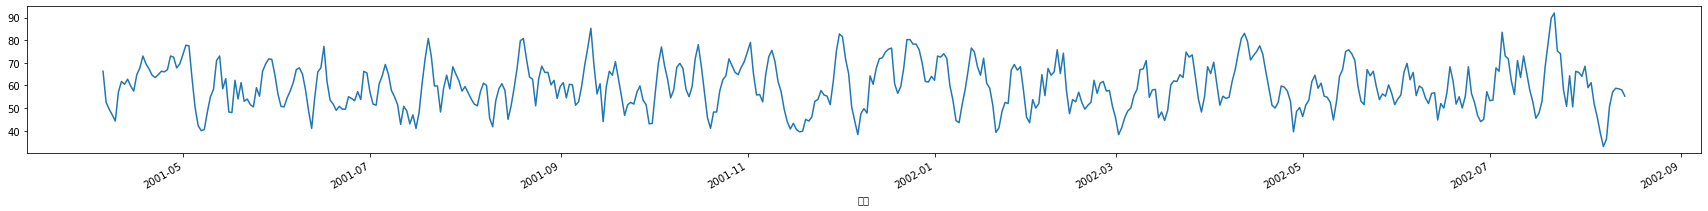

In [72]:
df['영어'].rolling(window=4).mean().plot(rot = 30, figsize=(30,3))

### 문제 6. 학생 영희의 영어과목 실력은 향상 되고 있는가? 4주 이동평균선이 up or down?

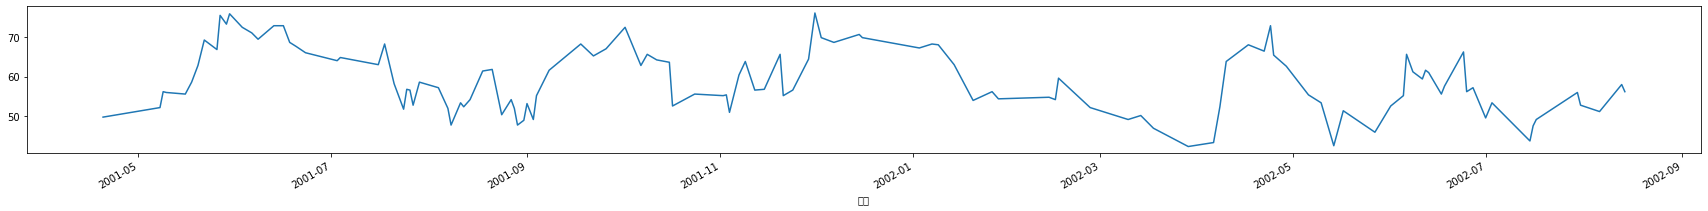

In [73]:
df[df['이름'] == '영희']['영어'].rolling(window=5).mean().plot(rot = 30, figsize=(30,3))

### 문제 7. 5가지 유형의 시험을 치른 첫번째 학생은 각각 누구인가? 
- '시험명' 분류별로 처음 시험을 치룬 instance
- Number each item in each group from 0 to the length of that group - 1

In [74]:
df[df.groupby('시험명').cumcount()==0] 

,이름,국어,영어,수학,과학,공부시간,시험명,출석
일자,,,,,,,,
2001-04-01 20:21:00,수철,76,81,26,71,3.94,A유형,0
2001-04-02 20:21:00,수철,93,48,81,84,3.02,B유형,0
2001-04-03 20:21:00,수철,30,64,26,84,2.64,C유형,1
2001-04-04 20:21:00,철수,74,72,46,65,4.75,D유형,1
2001-04-05 20:21:00,영희,42,26,79,91,4.83,E유형,1


확인

In [75]:
df[df['시험명'] == 'A유형']

,이름,국어,영어,수학,과학,공부시간,시험명,출석
일자,,,,,,,,
2001-04-01 20:21:00,수철,76,81,26,71,3.94,A유형,0
2001-04-06 20:21:00,영희,31,36,87,80,1.30,A유형,1
2001-04-11 20:21:00,철수,69,49,14,85,4.92,A유형,1
2001-04-16 20:21:00,수철,82,82,61,65,2.23,A유형,1
2001-04-21 20:21:00,희영,55,82,66,64,1.57,A유형,0
...,...,...,...,...,...,...,...,...
2002-07-20 20:21:00,수철,89,93,15,95,1.04,A유형,1
2002-07-25 20:21:00,희영,73,61,69,99,4.06,A유형,1
2002-07-30 20:21:00,영희,71,74,53,91,2.53,A유형,1


### 문제 8. 25개의 동일한 샘플을 추출하여 원래 데이터와 합친 경우, 중복데이터 중에서 국어 점수가 최고인 학생은?
-  random_state=401으로 무작위난수를 생성하여 df.sample(n=25)를 이용하여 append

중복데이터 생성

In [76]:
df = df.append(df.sample(n = 25, random_state=seed))

In [77]:
df[df.duplicated()].sort_values('국어', ascending=False).head()

,이름,국어,영어,수학,과학,공부시간,시험명,출석
일자,,,,,,,,
2001-07-18 20:21:00,희영,95,88,23,98,4.92,D유형,1
2002-06-16 20:21:00,영희,94,63,83,71,4.56,B유형,1
2002-08-13 20:21:00,영희,93,40,46,75,2.77,E유형,1
2001-07-06 20:21:00,수철,92,63,47,61,1.70,B유형,1
2002-01-30 20:21:00,수철,91,39,41,68,4.61,E유형,1


### 문제 9.  국어, 영어 점수가 동일한 학생 중에서 수학과목 점수가 가장 낮은 학생은 ? 

In [78]:
select_index = df[df.duplicated(['국어', '영어', '시험명'])].index

In [79]:
df.loc[select_index, :].sort_values('수학').head()

,이름,국어,영어,수학,과학,공부시간,시험명,출석
일자,,,,,,,,
2001-10-06 20:21:00,영희,88,45,10,91,3.63,D유형,1
2001-10-06 20:21:00,영희,88,45,10,91,3.63,D유형,1
2002-03-21 20:21:00,철수,66,62,15,71,2.82,E유형,1
2002-03-21 20:21:00,철수,66,62,15,71,2.82,E유형,1
2001-11-05 20:21:00,철수,85,73,22,74,3.79,D유형,1


### 문제 10.  수철이의  'A'와 'B' 유형 평균  영어점수가 다른 사람과 비교하여 높은 가? 
               (groupby, pivot_table, cross table)

In [80]:
df.groupby(['이름', '시험명'])['영어'].mean().unstack()
df.pivot_table(values=['영어'], index=['이름'], columns=['시험명'])

시험명,A유형,B유형,C유형,D유형,E유형
이름,,,,,
수철,68.032258,60.928571,57.615385,60.363636,57.285714
영희,57.357143,60.318182,61.625000,59.481481,53.884615
철수,66.235294,50.766667,60.720000,56.400000,61.000000
희영,53.115385,67.185185,52.250000,67.000000,59.000000


영어                                            
시험명        A유형        B유형        C유형        D유형        E유형
이름                                                        
수철   68.032258  60.928571  57.615385  60.363636  57.285714
영희   57.357143  60.318182  61.625000  59.481481  53.884615
철수   66.235294  50.766667  60.720000  56.400000  61.000000
희영   53.115385  67.185185  52.250000  67.000000  59.000000

In [81]:
pd.crosstab(df.이름, df.시험명, margins=True)

시험명,A유형,B유형,C유형,D유형,E유형,All
이름,,,,,,
수철,31,28,26,33,28,146
영희,28,22,32,27,26,135
철수,17,30,25,20,23,115
희영,26,27,20,27,29,129
All,102,107,103,107,106,525


## 자율 학습

# groupby.cumsum(), apply(), filter(), lambda

### 5. Apply 함수 , 사용자정의함수와 lambda 

두 개의 수자를 인자로 받아 더하는 함수 혹은 lambda 식을 구해보자

In [ ]:
def add_num(x,y):
    return x+y

In [ ]:
add_num_la = lambda x, y: x + y

In [ ]:
add_num(4, 9)
add_num_la(4, 9)

In [ ]:
df[['국어', '영어', '수학']].apply(np.mean) # 전체 평균
df[['국어', '영어', '수학']].apply(np.mean, axis=1) # 주별 학생별 평균

In [ ]:
def stand(x):
    a = (x - x.mean() /x.std())
    return a

In [ ]:
stand(df['국어'])

Apply()는 인스턴스 한개를 차례로 받아 한 줄 한 줄 수행

In [ ]:
df['국어'].apply(lambda x: (x - np.mean(x)))
df['국어'].apply(lambda x: (x - np.mean(x))/np.std(x))

In [ ]:
m = df['국어'].mean()
s = df['국어'].std()
df['국어'].apply(lambda x: (x - m) / s)

In [ ]:
df['국어'].apply(lambda x: x+20)

In [ ]:
def stand(x):
    a = (x - x.mean()) /x.std()
    return a

In [ ]:
stand(df['국어'])

### 6. 전체 총 시험 총점에서 철수학생의 총 시험점수가 차지하는 비중(점유율)

In [ ]:
df.insert(5, '총점', df[['국어', '영어', '수학', '과학']].sum(1))
df

In [ ]:
df.groupby('이름')['총점'].get_group('영희').head()

In [ ]:
(df.groupby('이름')['총점'].get_group('영희')/df['총점'].sum()).head()

전체 점수에서 철수가 차지하는 성적 점유율

In [ ]:
(df.groupby('이름')['총점'].get_group('영희')/df['총점'].sum()).sum()

전체 점수에서 선영이 차지하는 성적 점유율

In [ ]:
(df.groupby('이름')['총점'].get_group('영희')/df['총점'].sum()).sum()

### 7. Groupby와 aggregate, apply, filter
#### 7.1 apply (전체 행에 적용)
전체 시험점수 총합에서 학생별로 매주 국어성적이 차지하는 비중

In [ ]:
def norm_by_data(x):
    # x is a DataFrame of group values
    x['국어_비중'] = x['국어'] / x['총점']
    return x

In [ ]:
df.groupby('이름').apply(norm_by_data)

#### 7.1 apply (전체 행에 적용)
이름별로 자료표준화를 하려면(아주 유용)

In [ ]:
df = df.reset_index(drop=False)

In [ ]:
df.groupby('이름')['영어']

In [ ]:
df['표준화'] = df.groupby('이름')['영어'].apply(lambda x: (x - x.mean())/x.std())
df.head()

In [ ]:
data = df[df['이름'] == '영희']
data.head()

In [ ]:
data.describe()

#### 7.2 filter (선택 행에 적용하고 나머지는 인스턴스는 drop)
학생별로 영어 전체 평균점수가 60점 이상인 학생만 추출하면 철수, 영희는 대상 데이터에서 drop

In [ ]:
def filter_func(x):
    return x['영어'].mean() > 60

In [ ]:
df.groupby('이름').mean()

In [ ]:
df.groupby('이름').filter(filter_func)

# End